# Statistisk analyse på resultatene

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import pandas as pd
from scipy.stats import shapiro, ttest_rel, wilcoxon, norm, pearsonr, spearmanr
from sklearn.linear_model import LinearRegression

In [2]:
#Analyze multiple metrics and plot together
def analyze_metrics(metrics):
    fig, axes = plt.subplots(1, len(metrics), figsize=(5 * len(metrics), 5))

    if len(metrics) == 1:
        axes = [axes]  

    for i, (before, after, label) in enumerate(metrics):
        diff = after - before

        #Normality test
        stat, p_shapiro = shapiro(diff)
        print(f"\n[{label}] Shapiro-Wilk test p = {p_shapiro:.4f}")

        if p_shapiro > 0.05:
            stat, p_value = ttest_rel(after, before)
            test_name = "Paired t-test"
        else:
            stat, p_value = wilcoxon(after, before)
            test_name = "Wilcoxon signed-rank test"

        print(f"[{label}] {test_name} p = {p_value:.4f}")

    
        sns.histplot(diff, kde=True, ax=axes[i], stat="density", color='skyblue', edgecolor='black')

        #Add normal curve
        mu = np.mean(diff)
        sigma = np.std(diff)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        axes[i].plot(x, norm.pdf(x, mu, sigma), 'r--', label='Normal Curve')

        axes[i].axvline(mu, color='darkred', linestyle='-', label=f'Mean = {mu:.2f}')

        axes[i].set_title(f"{label}", fontsize=16)
        axes[i].set_xlabel("Difference (After - Before)", fontsize=14)
        axes[i].set_ylabel("Density", fontsize=14)
        axes[i].legend()

    plt.tight_layout()
    plt.show()


[DSC (Oncologist vs Proviz)] Shapiro-Wilk test p = 0.5925
[DSC (Oncologist vs Proviz)] Paired t-test p = 0.0176

[95% Housdorff (Oncologist vs Proviz)] Shapiro-Wilk test p = 0.5157
[95% Housdorff (Oncologist vs Proviz)] Paired t-test p = 0.0316

[DSC (Radiologist vs Proviz)] Shapiro-Wilk test p = 0.9652
[DSC (Radiologist vs Proviz)] Paired t-test p = 0.0030

[95% Hausdorff (Radiologist vs Proviz)] Shapiro-Wilk test p = 0.6394
[95% Hausdorff (Radiologist vs Proviz)] Paired t-test p = 0.0133


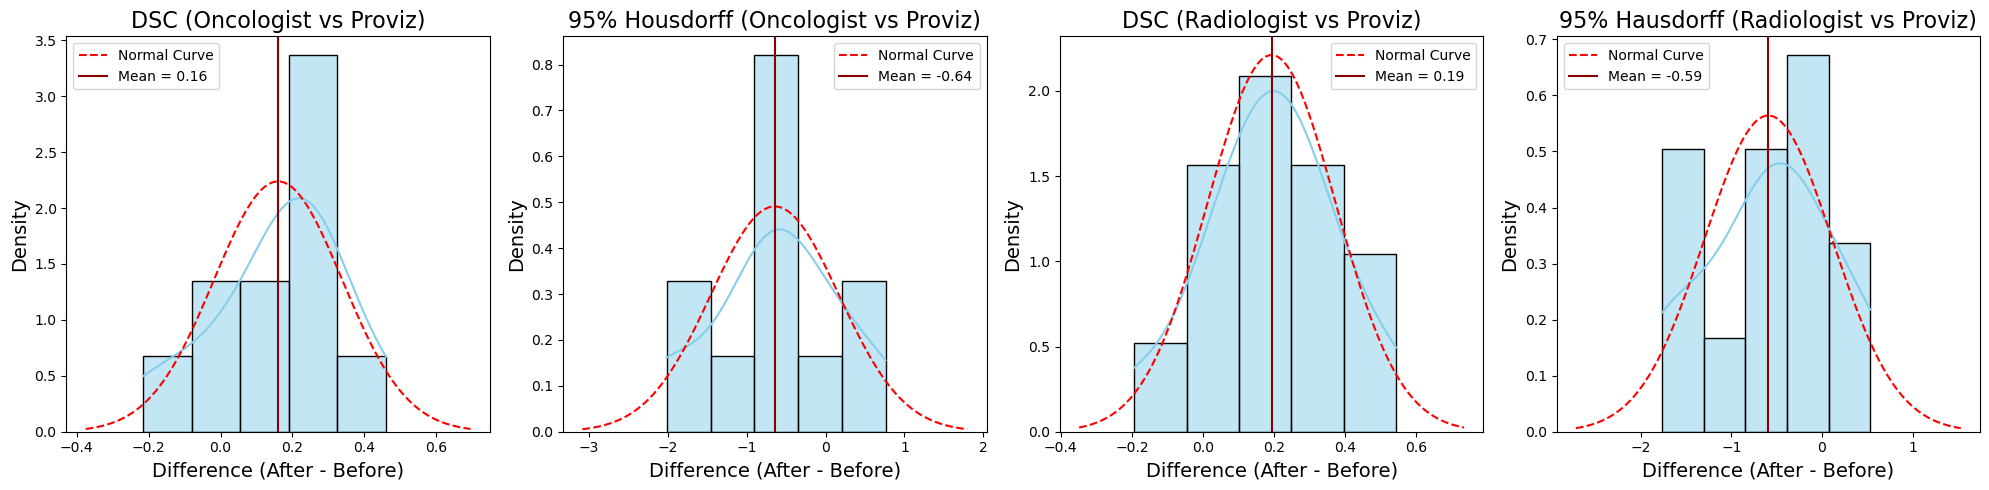

In [3]:
dice_N_before = np.array([0.398, 0.077, 0.584, 0.003, 0.297, 0.013, 0.103, 0.108, 0.015, 0.236, 0.004])
dice_N_after = np.array([0.671, 0.118, 0.369, 0.206, 0.419, 0.167, 0.029, 0.386, 0.263, 0.506, 0.464])

dice_S_before = np.array([0.276, 0.0004, 0.401, 0, 0.004, 0.172, 0, 0.006, 0.258, 0.233, 0, 0.309, 0.376])
dice_S_after = np.array([0.471, 0.023, 0.208, 0.032, 0.191, 0.447, 0.406, 0.344, 0.535, 0.299, 0.543, 0.487, 0.555])

haus_N_before = np.array([2.44, 2.15, 1.49, 2.55, 1.15, 2.11, 3.18, 1.66, 1.57, 1.52, 1.71])
haus_N_after = np.array([0.43, 1.41, 1.78, 1.78, 1.2, 2.87, 1.17, 1.13, 1.11, 0.89, 0.7])

haus_S_before = np.array([2.42, 2.36, 1.9, 2.6, 1.57, 0.96, 3.94, 1.63, 1.97, 1.14, 1.94, 1.6, 1.02])
haus_S_after = np.array([0.68, 1.79, 2.35, 2.35, 2.1, 0.66, 2.18, 0.99, 1.02, 1.18, 0.54, 0.84, 0.67])

analyze_metrics([
    (dice_N_before, dice_N_after, "DSC (Oncologist vs Proviz)"),
    (haus_N_before, haus_N_after, "95% Housdorff (Oncologist vs Proviz)"),
    (dice_S_before, dice_S_after, "DSC (Radiologist vs Proviz)"),
    (haus_S_before, haus_S_after, "95% Hausdorff (Radiologist vs Proviz)"),
])


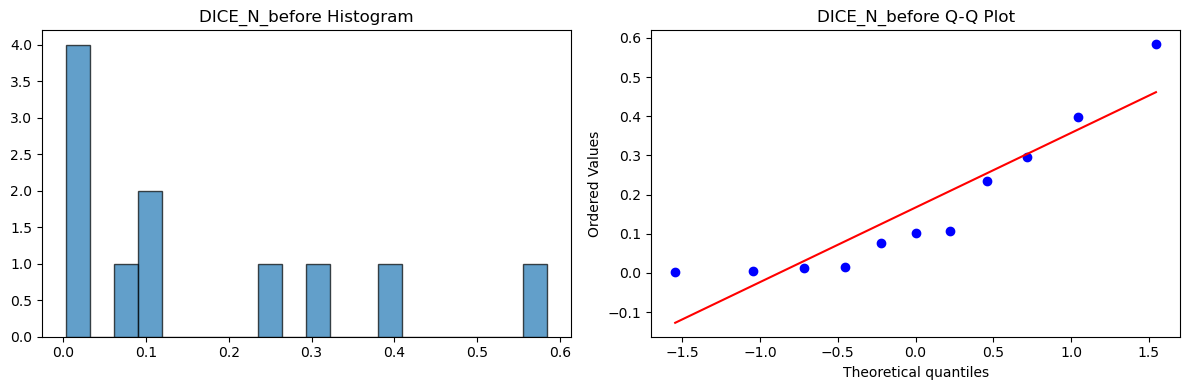

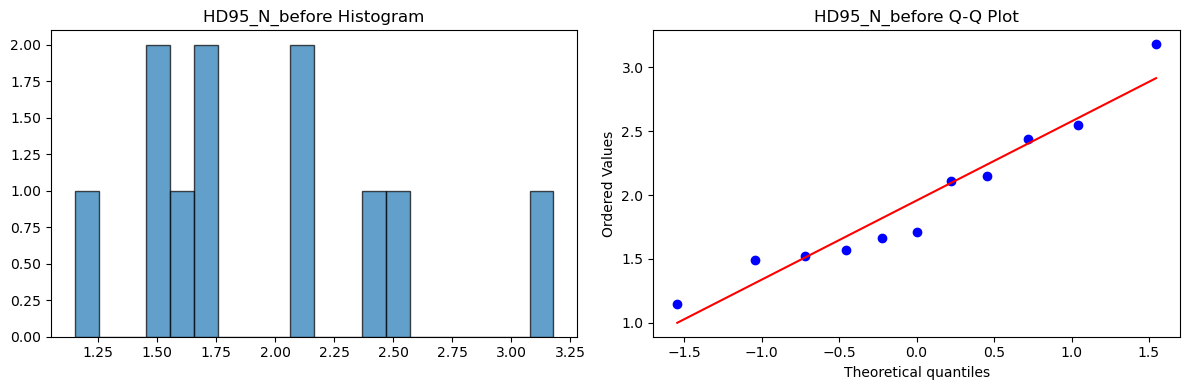

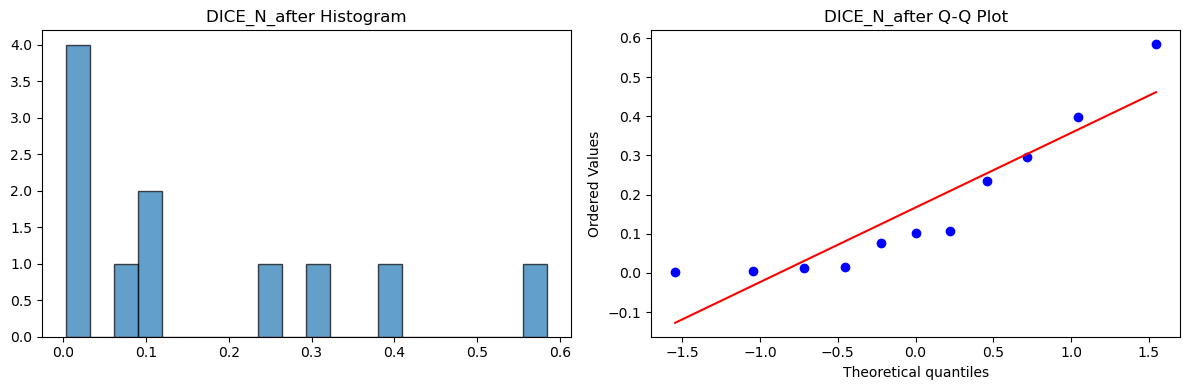

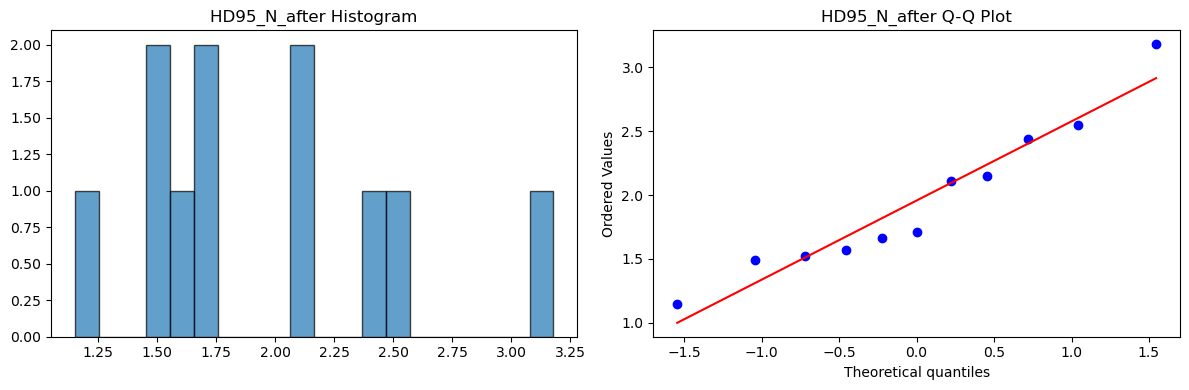

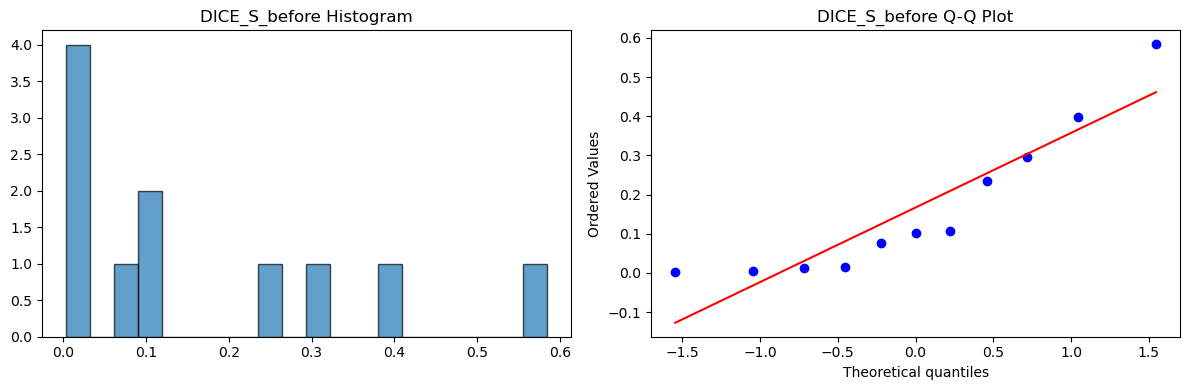

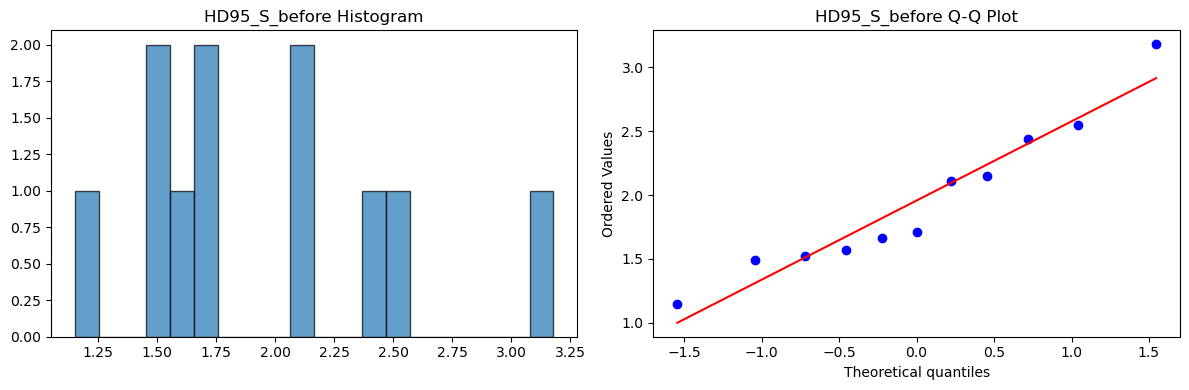

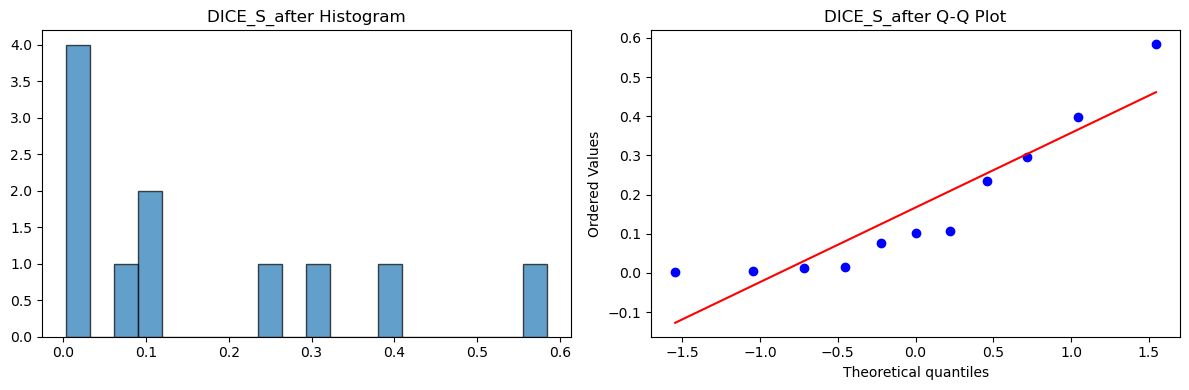

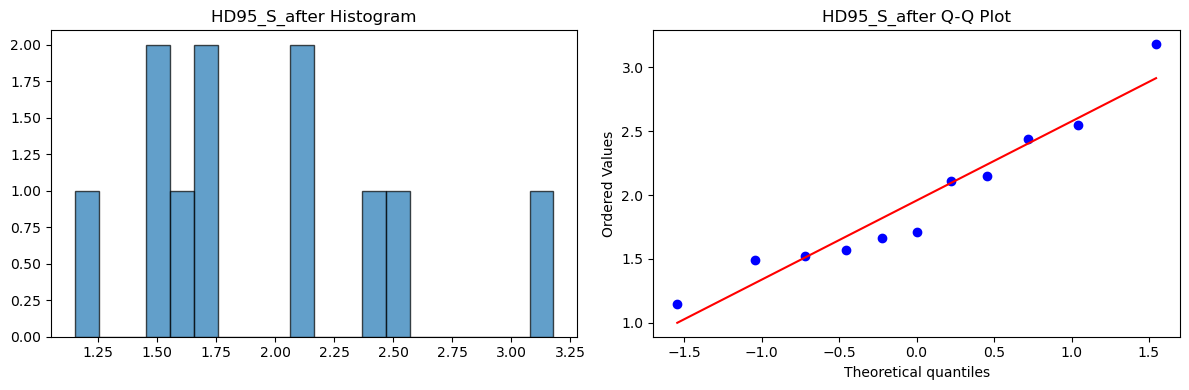

DICE Normality Test: {'DICE_N_after_Shapiro_p_value': 0.03271128609776497, 'DICE_N_after_Normal_(Shapiro)': False}
HD95 Normality Test: {'HD95_N_after_Shapiro_p_value': 0.48092952370643616, 'HD95_N_after_Normal_(Shapiro)': True}
DICE Normality Test: {'DICE_S_before_Shapiro_p_value': 0.03271128609776497, 'DICE_S_before_Normal_(Shapiro)': False}
HD95 Normality Test: {'HD95_S_before_Shapiro_p_value': 0.48092952370643616, 'HD95_S_before_Normal_(Shapiro)': True}
DICE Normality Test: {'DICE_S_after_Shapiro_p_value': 0.03271128609776497, 'DICE_S_after_Normal_(Shapiro)': False}
HD95 Normality Test: {'HD95_S_after_Shapiro_p_value': 0.48092952370643616, 'HD95_S_after_Normal_(Shapiro)': True}


In [4]:
def check_normal_distribution(values, label=""):
    values = np.array(values)
    
    # Shapiro-Wilk Test
    shapiro_stat, shapiro_p = stats.shapiro(values)

    # Plot Histogram
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.hist(values, bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'{label} Histogram')
    
    # Plot Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(values, dist="norm", plot=plt)
    plt.title(f'{label} Q-Q Plot')

    plt.tight_layout()
    plt.show()

    return {
        f"{label}_Shapiro_p_value": shapiro_p,
        f"{label}_Normal_(Shapiro)": shapiro_p > 0.05,
    }


dice_result_a = check_normal_distribution(dice_N_before, "DICE_N_before")
hd95_result_a = check_normal_distribution(haus_N_before, "HD95_N_before")

dice_result_b = check_normal_distribution(dice_N_before, "DICE_N_after")
hd95_result_b = check_normal_distribution(haus_N_before, "HD95_N_after")

dice_result_c = check_normal_distribution(dice_N_before, "DICE_S_before")
hd95_result_c = check_normal_distribution(haus_N_before, "HD95_S_before")

dice_result_d = check_normal_distribution(dice_N_before, "DICE_S_after")
hd95_result_d = check_normal_distribution(haus_N_before, "HD95_S_after")


print("DICE Normality Test:", dice_result_b)
print("HD95 Normality Test:", hd95_result_b)

print("DICE Normality Test:", dice_result_c)
print("HD95 Normality Test:", hd95_result_c)

print("DICE Normality Test:", dice_result_d)
print("HD95 Normality Test:", hd95_result_d)


In [5]:
def cohen_d_paired(before, after):
    diff = after - before
    return np.mean(diff) / np.std(diff, ddof=1)

d1 = cohen_d_paired(dice_N_before, dice_N_after)
print(f"Cohen's d = {d1:.3f}")

d2 = cohen_d_paired(dice_S_before, dice_S_after)
print(f"Cohen's d = {d2:.3f}")

d3 = cohen_d_paired(haus_N_before, haus_N_after)
print(f"Cohen's d = {d3:.3f}")

d4 = cohen_d_paired(haus_S_before, haus_S_after)
print(f"Cohen's d = {d4:.3f}")


Cohen's d = 0.856
Cohen's d = 1.026
Cohen's d = -0.753
Cohen's d = -0.805


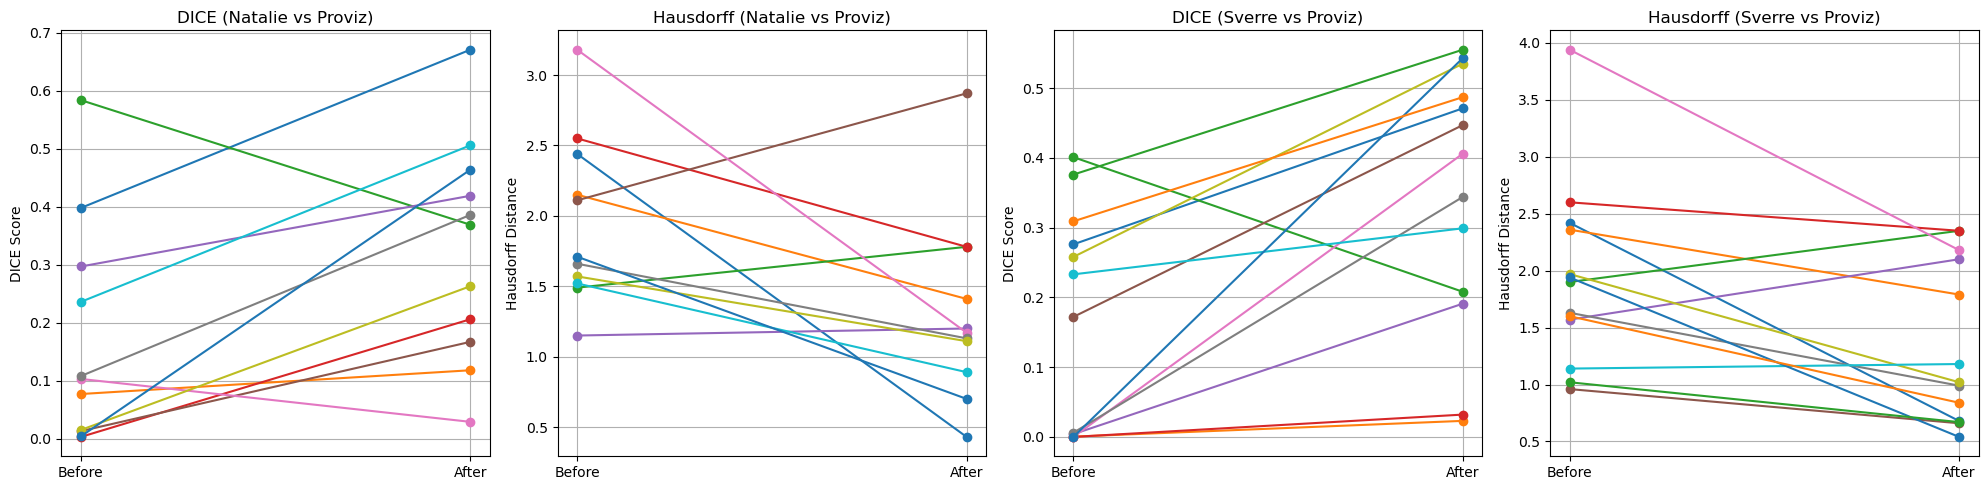

In [6]:
def plot_metric_changes(metrics):
    fig, axes = plt.subplots(1, len(metrics), figsize=(5 * len(metrics), 5))

    if len(metrics) == 1:
        axes = [axes]

    for i, (before, after, label, ylabel) in enumerate(metrics):
        for j in range(len(before)):
            axes[i].plot([0, 1], [before[j], after[j]], marker='o')

        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(['Before', 'After'])
        axes[i].set_title(label)
        axes[i].set_ylabel(ylabel)
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()


plot_metric_changes([
    (dice_N_before, dice_N_after, "DICE (Natalie vs Proviz)", "DICE Score"),
    (haus_N_before, haus_N_after, "Hausdorff (Natalie vs Proviz)", "Hausdorff Distance"),
    (dice_S_before, dice_S_after, "DICE (Sverre vs Proviz)", "DICE Score"),
    (haus_S_before, haus_S_after, "Hausdorff (Sverre vs Proviz)", "Hausdorff Distance"),
])


In [7]:
diff = dice_N_after - dice_N_before
mean_diff = np.mean(diff)
sem = stats.sem(diff)
ci = stats.t.interval(0.95, len(diff)-1, loc=mean_diff, scale=sem)
print(f"Mean diff = {mean_diff:.3f}, 95% CI = {ci}")

Mean diff = 0.160, 95% CI = (0.03442235594703533, 0.2855776440529647)


In [8]:
print("Before:", pd.Series(dice_N_before).describe())
print("After:", pd.Series(dice_N_after).describe())


Before: count    11.000000
mean      0.167091
std       0.191016
min       0.003000
25%       0.014000
50%       0.103000
75%       0.266500
max       0.584000
dtype: float64
After: count    11.000000
mean      0.327091
std       0.189651
min       0.029000
25%       0.186500
50%       0.369000
75%       0.441500
max       0.671000
dtype: float64


### DICE og Volum korrelasjon

In [9]:
def annotate_r2(ax, x, y, color='black', xpos=0.05, ypos=0.95):
    model = LinearRegression().fit(x.reshape(-1, 1), y)
    r2 = model.score(x.reshape(-1, 1), y)
    ax.text(xpos, ypos, f'$R^2$ = {r2:.3f}', transform=ax.transAxes,
            ha='left', va='top', fontsize=16, color=color)


def analyze_segmentation_metrics(vol_ai, vol_gt, dice_scores, hd95_scores=None, plot=True):
   
    df = pd.DataFrame({
        'V_AI': vol_ai,
        'V_GT': vol_gt,
        'DICE': dice_scores
    })
    
    df['abs_vol_diff'] = abs(df['V_AI'] - df['V_GT'])
    df['rel_vol_diff_percent'] = ((df['V_AI'] - df['V_GT']) / df['V_GT']) * 100

    if hd95_scores is not None:
        df['HD95'] = hd95_scores

    #Pearson and Spearman - DICE
    pearson_r, pearson_p = pearsonr(df['rel_vol_diff_percent'], df['DICE'])
    spearman_rho, spearman_p = spearmanr(df['rel_vol_diff_percent'], df['DICE'])

    print(f"Pearson r = {pearson_r:.3f}, p-value = {pearson_p:.4f}")
    print(f"Spearman ρ = {spearman_rho:.3f}, p-value = {spearman_p:.4f}")

    #Pearson and Spearman - HD95
    pearson_r_hd, pearson_p_hd = pearsonr(df['rel_vol_diff_percent'], df['HD95'])
    spearman_rho_hd, spearman_p_hd = spearmanr(df['rel_vol_diff_percent'], df['HD95'])

    print(f"Pearson r = {pearson_r_hd:.3f}, p-value = {pearson_p_hd:.4f}")
    print(f"Spearman ρ = {spearman_rho_hd:.3f}, p-value = {spearman_p_hd:.4f}")

    #Plotting
    if plot:
        sns.set(style='whitegrid')
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    #DICE vs Relative Volume Difference
        sns.regplot(data=df, x='rel_vol_diff_percent', y='DICE',
                    scatter_kws={'s': 80}, line_kws={'color': 'blue'}, ax=axes[0])
        annotate_r2(axes[0],
                    df['rel_vol_diff_percent'].values,
                    df['DICE'].values,
                    color='blue')
        
        axes[0].axhline(0, color='gray', linestyle='--', linewidth=1)
        axes[0].axvline(0, color='gray', linestyle='--', linewidth=1)
        axes[0].set_title('DICE vs. Relative Volume Difference')
        axes[0].set_xlabel('Relative Volume Difference (%)')
        axes[0].set_ylabel('DICE Score')

    #95HD vs Relative Volume Difference
        if hd95_scores is not None:
            sns.regplot(data=df, x='rel_vol_diff_percent', y='HD95',
                        scatter_kws={'s':80}, line_kws={'color': 'darkred'}, ax=axes[1])
            annotate_r2(axes[1],
                        df['rel_vol_diff_percent'].values,
                        df['HD95'].values,
                        color='darkred')
            axes[1].axhline(0, color='gray', linestyle='--', linewidth=1)
            axes[1].axvline(0, color='gray', linestyle='--', linewidth=1)
            axes[1].set_title('95HD vs. Relative Volume Difference')
            axes[1].set_xlabel('Relative Volume Difference (%)')
            axes[1].set_ylabel('95% Hausdorff Distance')

        plt.tight_layout()
        plt.show()

    return df


Pearson r = -0.347, p-value = 0.2965
Spearman ρ = -0.455, p-value = 0.1601
Pearson r = 0.868, p-value = 0.0005
Spearman ρ = 0.755, p-value = 0.0073


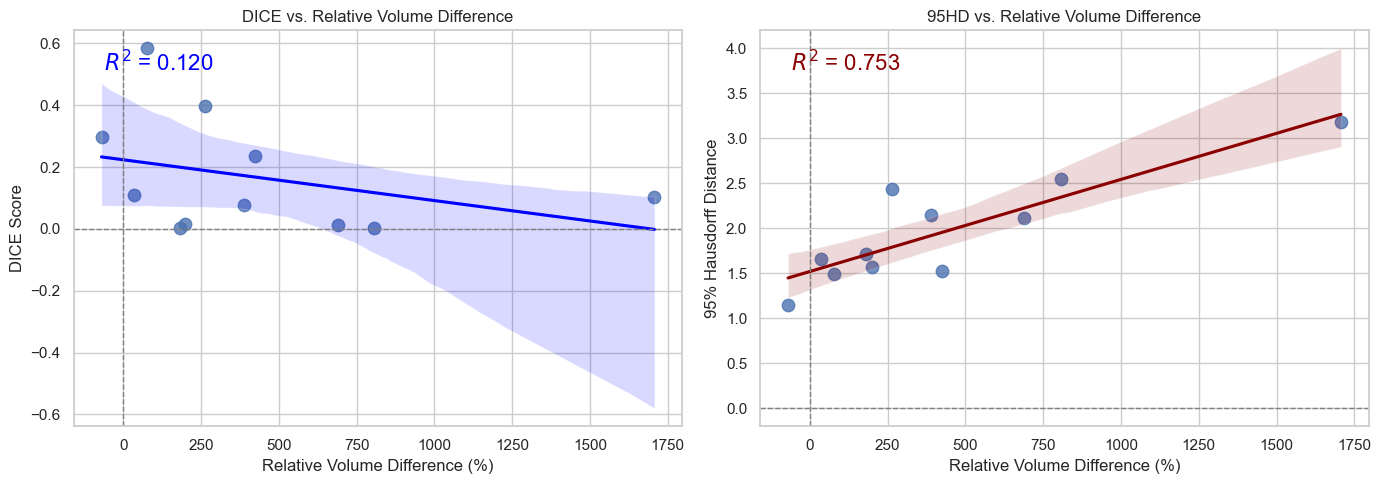

Pearson r = -0.385, p-value = 0.2425
Spearman ρ = -0.400, p-value = 0.2229
Pearson r = 0.828, p-value = 0.0017
Spearman ρ = 0.518, p-value = 0.1025


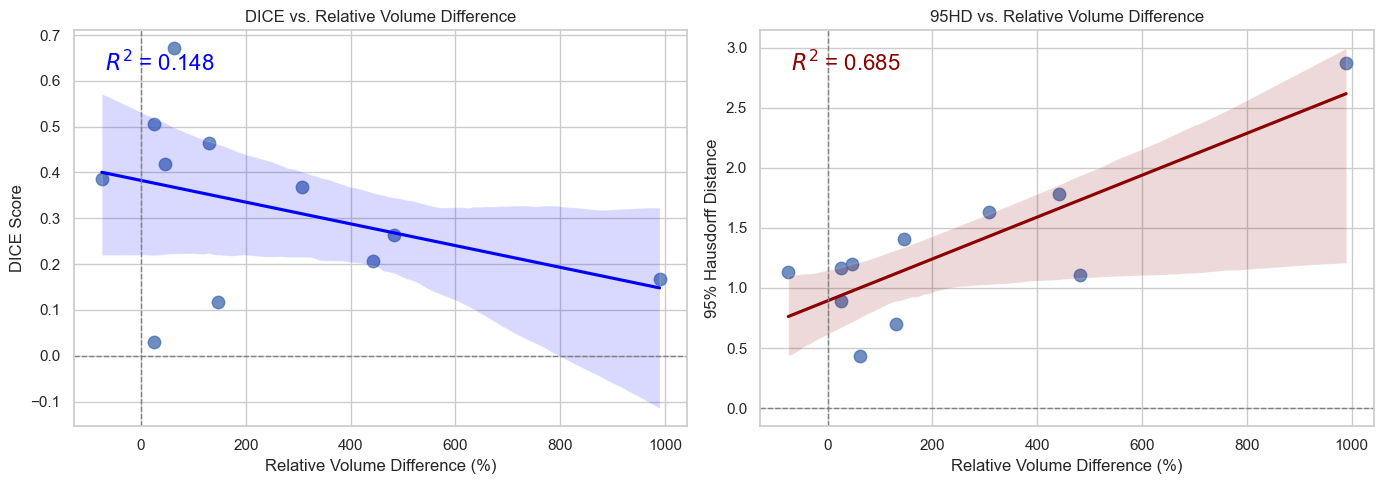

Pearson r = -0.550, p-value = 0.0516
Spearman ρ = -0.569, p-value = 0.0424
Pearson r = 0.707, p-value = 0.0069
Spearman ρ = 0.813, p-value = 0.0007


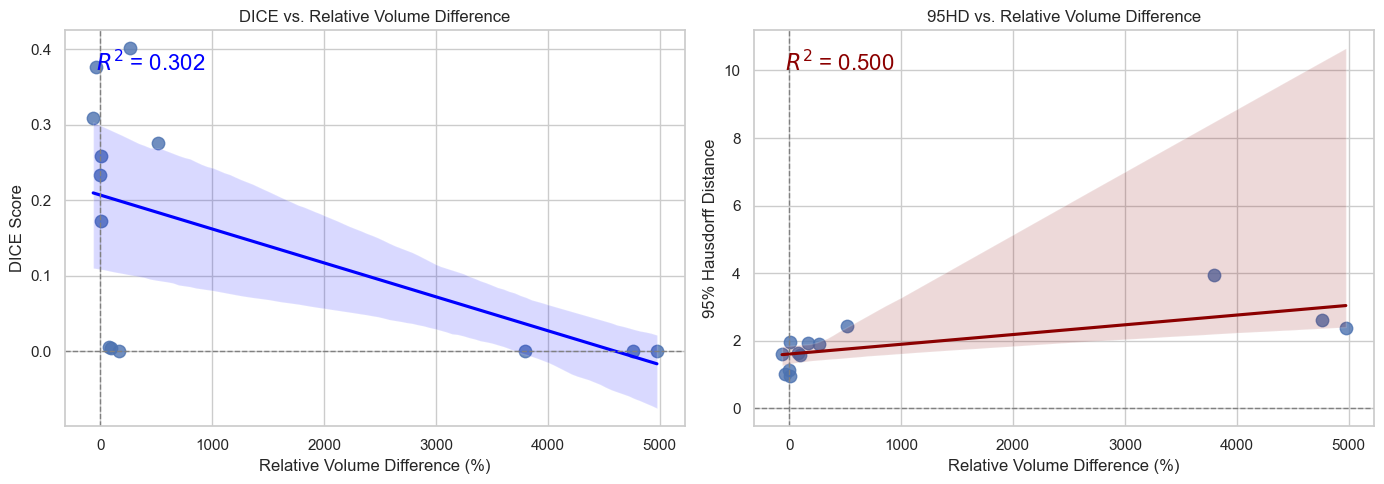

Pearson r = -0.860, p-value = 0.0002
Spearman ρ = -0.577, p-value = 0.0390
Pearson r = 0.679, p-value = 0.0108
Spearman ρ = 0.501, p-value = 0.0814


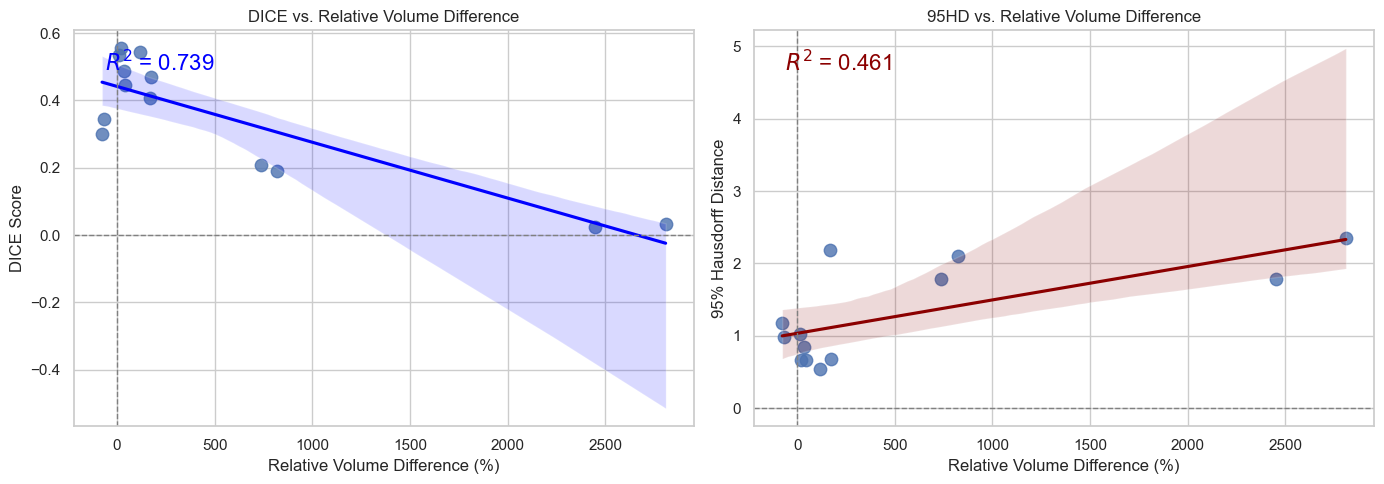

In [10]:
#Oncologist vs Proviz
V_AI_rtMR_N = [8.38, 4.06, 5.85, 5.35, 4.94, 1.5, 10.12, 5.9, 2.96, 5.14, 6.12] 
V_AI_dMR_N = [3.74, 2.04, 13.41, 3.2, 23.78, 2.07, 0.7, 1.08, 5.76, 1.22, 4.98]
V_Nat = [2.31, 0.83, 3.29, 0.59, 16.29, 0.19, 0.56, 4.34, 0.99, 0.98, 2.17] 

DICE_NP_rtMR = [0.398, 0.077, 0.584, 0.003, 0.297, 0.013, 0.103, 0.108, 0.015, 0.236, 0.004] 
HD95_NP_rtMR = [2.44, 2.15, 1.49, 2.55, 1.15, 2.11, 3.18, 1.66, 1.57, 1.52, 1.71]
DICE_NP_dMR = [0.671, 0.118, 0.369, 0.206, 0.419, 0.167, 0.029, 0.386, 0.263, 0.506, 0.464]
HD95_NP_dMR = [0.43, 1.41, 1.63, 1.78, 1.2, 2.87, 1.17, 1.13, 1.11, 0.89, 0.7]

#Radiologist vs Proviz
V_AI_rtMR_S = [8.38, 4.06, 5.85, 5.35, 4.94, 1.5, 10.12, 5.9, 12.08, 5.14, 6.12, 3.29, 3.75]
V_AI_dMR_S = [3.74, 2.04, 13.41, 3.2, 23.78, 2.07, 0.7, 1.08, 12.63, 1.22, 4.98, 12.66, 7.26]
V_Sverre = [1.37, 0.08, 1.6, 0.11, 2.58, 1.45, 0.26, 3.32, 11.23, 5.17, 2.29, 9.47, 5.96]

DICE_SP_rtMR = [0.276, 0.0004, 0.401, 0, 0.004, 0.172, 0, 0.006, 0.258, 0.233, 0, 0.309, 0.376]
HD95_SP_rtMR = [2.42, 2.36, 1.9, 2.6, 1.57, 0.96, 3.94, 1.63, 1.97, 1.14, 1.94, 1.6, 1.02]
DICE_SP_dMR = [0.471, 0.023, 0.208, 0.032, 0.191, 0.447, 0.406, 0.344, 0.535, 0.299, 0.543, 0.487, 0.555]
HD95_SP_dMR = [0.68, 1.79, 1.79, 2.35, 2.1, 0.66, 2.18, 0.99, 1.02, 1.18, 0.54, 0.84, 0.67]

#Visualisering
results_df = analyze_segmentation_metrics(V_AI_rtMR_N, V_Nat, DICE_NP_rtMR, HD95_NP_rtMR)
results_df = analyze_segmentation_metrics(V_AI_dMR_N, V_Nat, DICE_NP_dMR, HD95_NP_dMR)
results_df = analyze_segmentation_metrics(V_AI_rtMR_S, V_Sverre, DICE_SP_rtMR, HD95_SP_rtMR)
results_df = analyze_segmentation_metrics(V_AI_dMR_S, V_Sverre, DICE_SP_dMR, HD95_SP_dMR)


In [11]:
def analyze_segmentation_metrics(vol_ai, vol_gt, dice_scores, hd95_scores=None, plot=True):
   
    df = pd.DataFrame({
        'V_AI': vol_ai,
        'V_GT': vol_gt,
        'DICE': dice_scores
    })
    
    df['abs_vol_diff'] = abs(df['V_AI'] - df['V_GT'])
    df['rel_vol_diff_percent'] = ((df['V_AI'] - df['V_GT']) / df['V_GT']) * 100


    if hd95_scores is not None:
        df['HD95'] = hd95_scores

    #Filtering
    filtered_vol_ai = []
    filtered_vol_gt = []
    filtered_dice = []
    filtered_hd95 = [] if hd95_scores is not None else None

    for ai, gt, dice, *hd95 in zip(vol_ai, vol_gt, dice_scores, *(hd95_scores,) if hd95_scores is not None else ()):
        rel_diff = ((ai - gt) / gt) * 100
        if abs(rel_diff) <= 800:
            filtered_vol_ai.append(ai)
            filtered_vol_gt.append(gt)
            filtered_dice.append(dice)
            if hd95_scores is not None:
                filtered_hd95.append(hd95[0]) 

#DataFrame from filtered values
    df = pd.DataFrame({
        'V_AI': filtered_vol_ai,
        'V_GT': filtered_vol_gt,
        'DICE': filtered_dice
    })
    df['rel_vol_diff_percent'] = ((df['V_AI'] - df['V_GT']) / df['V_GT']) * 100
    df['abs_vol_diff'] = abs(df['V_AI'] - df['V_GT'])

    if hd95_scores is not None:
        df['HD95'] = filtered_hd95


    #Pearson and Spearman: DICE
    pearson_r, pearson_p = pearsonr(df['rel_vol_diff_percent'], df['DICE'])
    spearman_rho, spearman_p = spearmanr(df['rel_vol_diff_percent'], df['DICE'])

    print(f"Pearson r = {pearson_r:.3f}, p-value = {pearson_p:.4f}")
    print(f"Spearman ρ = {spearman_rho:.3f}, p-value = {spearman_p:.4f}")

    #Pearson and Spearman: HD95
    pearson_r_hd, pearson_p_hd = pearsonr(df['rel_vol_diff_percent'], df['HD95'])
    spearman_rho_hd, spearman_p_hd = spearmanr(df['rel_vol_diff_percent'], df['HD95'])

    print(f"Pearson r = {pearson_r_hd:.3f}, p-value = {pearson_p_hd:.4f}")
    print(f"Spearman ρ = {spearman_rho_hd:.3f}, p-value = {spearman_p_hd:.4f}")

    #Plotting
    if plot:
        sns.set(style='whitegrid')
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    #DICE vs Relative Volume Difference
        sns.regplot(data=df, x='rel_vol_diff_percent', y='DICE',
                    scatter_kws={'s': 80}, line_kws={'color': 'blue'}, ax=axes[0])
        annotate_r2(axes[0],
                    df['rel_vol_diff_percent'].values,
                    df['DICE'].values,
                    color='blue')
        
        axes[0].axhline(0, color='gray', linestyle='--', linewidth=1)
        axes[0].axvline(0, color='gray', linestyle='--', linewidth=1)
        axes[0].set_title('DICE vs. Relative Volume Difference')
        axes[0].set_xlabel('Relative Volume Difference (%)')
        axes[0].set_ylabel('DICE Score')

    #95HD vs Relative Volume Difference
        if hd95_scores is not None:
            sns.regplot(data=df, x='rel_vol_diff_percent', y='HD95',
                        scatter_kws={'s':80}, line_kws={'color': 'darkred'}, ax=axes[1])
            annotate_r2(axes[1],
                    df['rel_vol_diff_percent'].values,
                    df['HD95'].values,
                    color='blue')
            axes[1].axhline(0, color='gray', linestyle='--', linewidth=1)
            axes[1].axvline(0, color='gray', linestyle='--', linewidth=1)
            axes[1].set_title('95HD vs. Relative Volume Difference')
            axes[1].set_xlabel('Relative Volume Difference (%)')
            axes[1].set_ylabel('95% Hausdorff Distance')

        plt.tight_layout()
        plt.show()

    return df

Pearson r = -0.389, p-value = 0.3011
Spearman ρ = -0.333, p-value = 0.3807
Pearson r = 0.607, p-value = 0.0829
Spearman ρ = 0.550, p-value = 0.1250


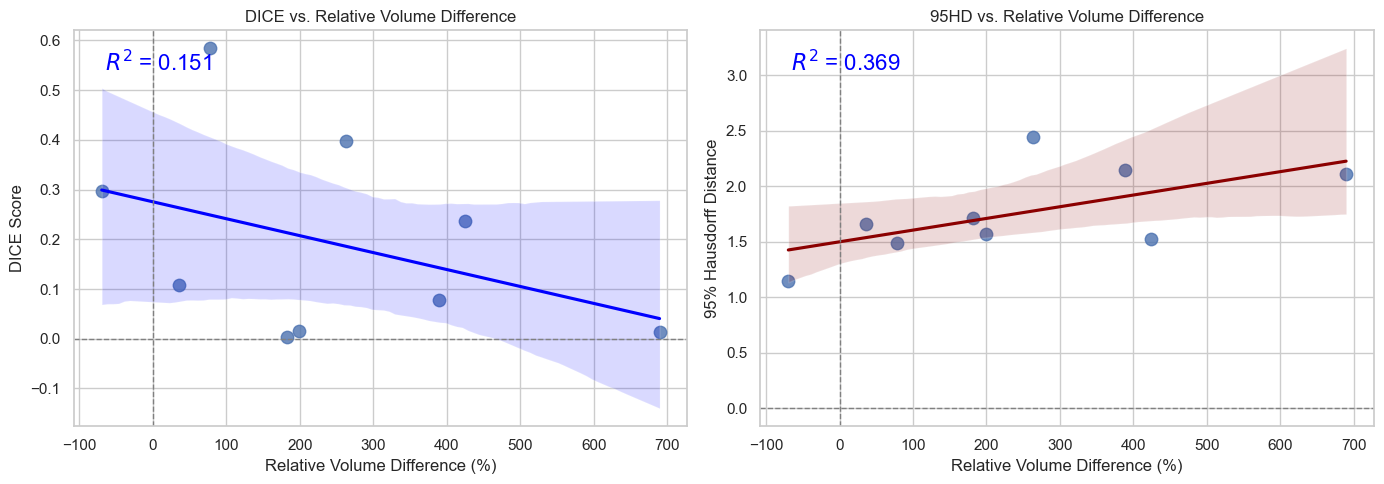

Pearson r = -0.281, p-value = 0.4310
Spearman ρ = -0.345, p-value = 0.3282
Pearson r = 0.504, p-value = 0.1377
Spearman ρ = 0.358, p-value = 0.3104


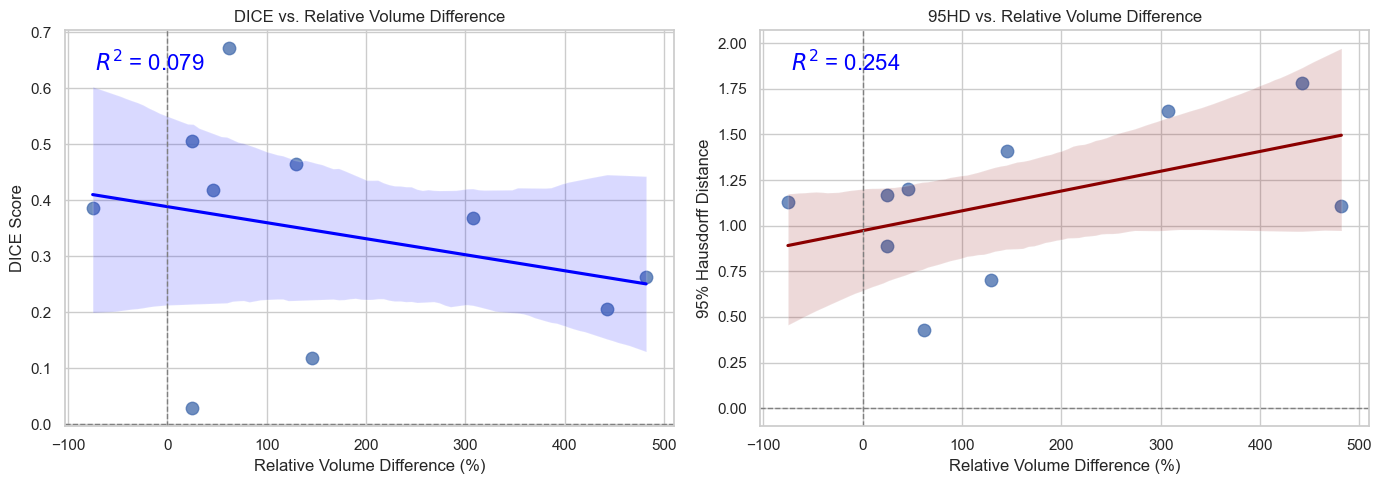

Pearson r = 0.037, p-value = 0.9190
Spearman ρ = -0.188, p-value = 0.6032
Pearson r = 0.763, p-value = 0.0103
Spearman ρ = 0.673, p-value = 0.0330


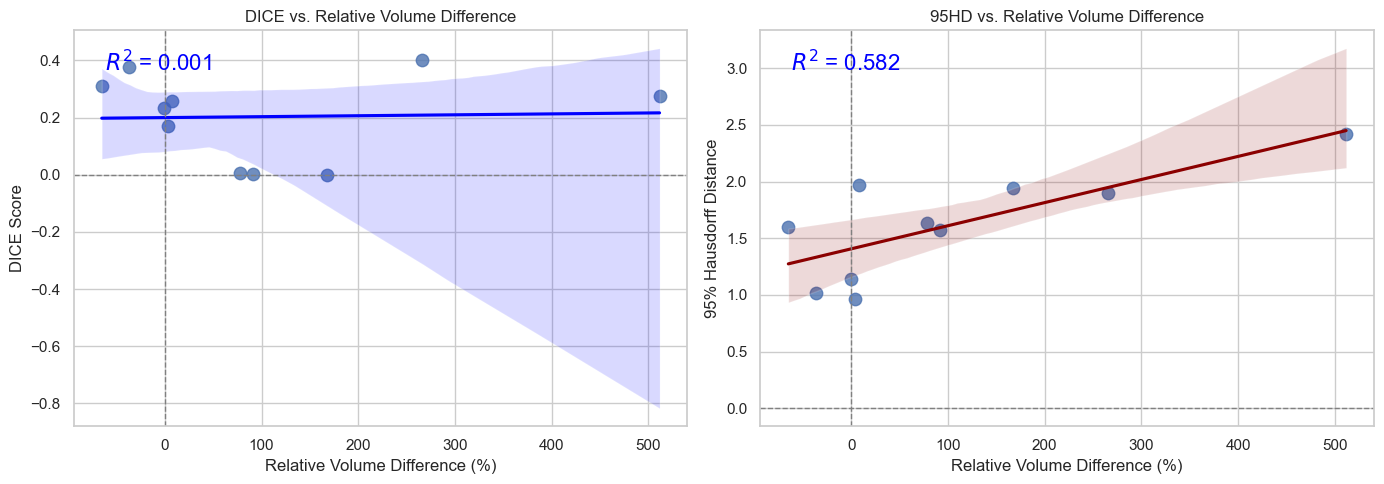

Pearson r = -0.513, p-value = 0.1299
Spearman ρ = -0.079, p-value = 0.8287
Pearson r = 0.503, p-value = 0.1381
Spearman ρ = 0.006, p-value = 0.9867


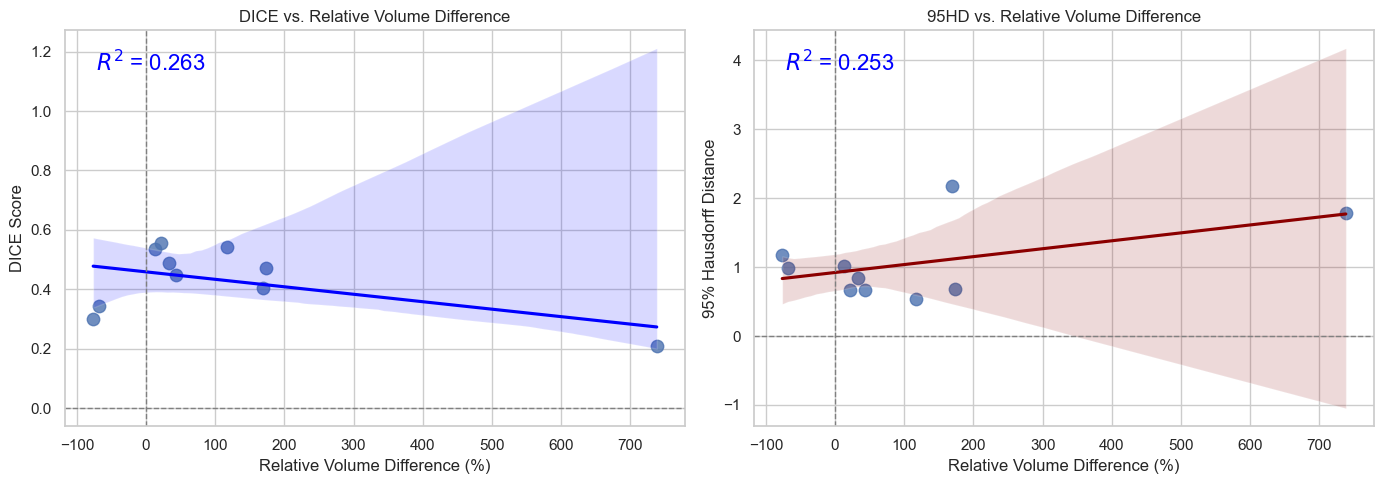

In [12]:
#Natalie vs Proviz
V_AI_rtMR_N = [8.38, 4.06, 5.85, 5.35, 4.94, 1.5, 10.12, 5.9, 2.96, 5.14, 6.12] 
V_AI_dMR_N = [3.74, 2.04, 13.41, 3.2, 23.78, 2.07, 0.7, 1.08, 5.76, 1.22, 4.98]
V_Nat = [2.31, 0.83, 3.29, 0.59, 16.29, 0.19, 0.56, 4.34, 0.99, 0.98, 2.17] 

DICE_NP_rtMR = [0.398, 0.077, 0.584, 0.003, 0.297, 0.013, 0.103, 0.108, 0.015, 0.236, 0.004] 
HD95_NP_rtMR = [2.44, 2.15, 1.49, 2.55, 1.15, 2.11, 3.18, 1.66, 1.57, 1.52, 1.71]
DICE_NP_dMR = [0.671, 0.118, 0.369, 0.206, 0.419, 0.167, 0.029, 0.386, 0.263, 0.506, 0.464]
HD95_NP_dMR = [0.43, 1.41, 1.63, 1.78, 1.2, 2.87, 1.17, 1.13, 1.11, 0.89, 0.7]

#Sverre vs Proviz
V_AI_rtMR_S = [8.38, 4.06, 5.85, 5.35, 4.94, 1.5, 10.12, 5.9, 12.08, 5.14, 6.12, 3.29, 3.75]
V_AI_dMR_S = [3.74, 2.04, 13.41, 3.2, 23.78, 2.07, 0.7, 1.08, 12.63, 1.22, 4.98, 12.66, 7.26]
V_Sverre = [1.37, 0.08, 1.6, 0.11, 2.58, 1.45, 0.26, 3.32, 11.23, 5.17, 2.29, 9.47, 5.96]

DICE_SP_rtMR = [0.276, 0.0004, 0.401, 0, 0.004, 0.172, 0, 0.006, 0.258, 0.233, 0, 0.309, 0.376]
HD95_SP_rtMR = [2.42, 2.36, 1.9, 2.6, 1.57, 0.96, 3.94, 1.63, 1.97, 1.14, 1.94, 1.6, 1.02]
DICE_SP_dMR = [0.471, 0.023, 0.208, 0.032, 0.191, 0.447, 0.406, 0.344, 0.535, 0.299, 0.543, 0.487, 0.555]
HD95_SP_dMR = [0.68, 1.79, 1.79, 2.35, 2.1, 0.66, 2.18, 0.99, 1.02, 1.18, 0.54, 0.84, 0.67]

#Visualisering
results_df = analyze_segmentation_metrics(V_AI_rtMR_N, V_Nat, DICE_NP_rtMR, HD95_NP_rtMR)
results_df = analyze_segmentation_metrics(V_AI_dMR_N, V_Nat, DICE_NP_dMR, HD95_NP_dMR)
results_df = analyze_segmentation_metrics(V_AI_rtMR_S, V_Sverre, DICE_SP_rtMR, HD95_SP_rtMR)
results_df = analyze_segmentation_metrics(V_AI_dMR_S, V_Sverre, DICE_SP_dMR, HD95_SP_dMR)


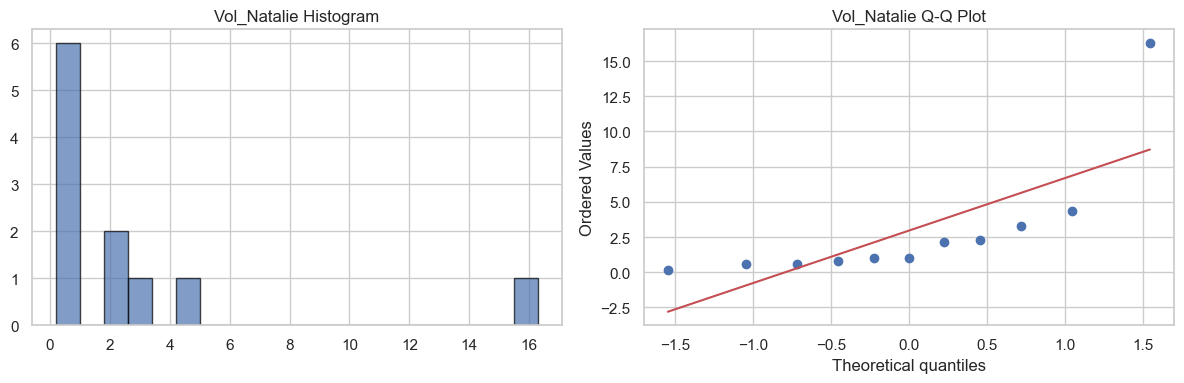

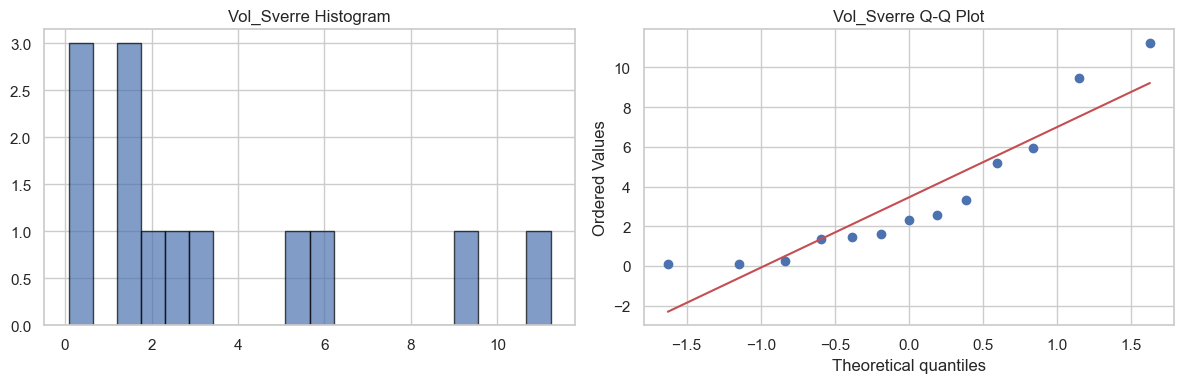

Vol_Nat Normality Test: {'Vol_Natalie_Shapiro_p_value': 1.8382121197646484e-05, 'Vol_Natalie_Normal_(Shapiro)': False}
Vol_Sv Normality Test: {'Vol_Sverre_Shapiro_p_value': 0.026138929650187492, 'Vol_Sverre_Normal_(Shapiro)': False}


In [13]:
Vol_Nat = check_normal_distribution(V_Nat, "Vol_Natalie")
Vol_Sv = check_normal_distribution(V_Sverre, "Vol_Sverre")
#Vol_Prt = check_normal_distribution(dice_N_before, "DICE_S_after")
#Vol_Pd = check_normal_distribution(haus_N_before, "HD95_S_after")

print("Vol_Nat Normality Test:", Vol_Nat)
print("Vol_Sv Normality Test:", Vol_Sv)
#print("Vol_Prt Normality Test:", dice_result_a)
#print("Vol_Pd Normality Test:", hd95_result_a)